In [1]:
#installing the required packages for google colab
!pip install https://github.com/nithinmurali/pygsheets/archive/master.zip
!apt-get -qq install -y graphviz && pip install -q pydot

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
     | 112kB 3.1MB/s
  Running setup.py bdist_wheel for pygsheets ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-yf4zk5jb/wheels/d9/57/8e/549fffb1482b9d3ec4f60a378f4c32f3dbba74e4aad728dd27
Successfully built pygsheets
Selecting previously unselected package fontconfig.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../01-libjbig0_2.1-3.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package libcdt5.
Preparing to unpack .../02-libcdt5_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcdt5 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libcgraph6.
Preparing to unpack .../03-libcgraph6_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcgraph

Unpacking libgraphite2-3:amd64 (1.3.10-2) ...
Selecting previously unselected package libharfbuzz0b:amd64.
Preparing to unpack .../18-libharfbuzz0b_1.4.2-1_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (1.4.2-1) ...
Selecting previously unselected package libpangoft2-1.0-0:amd64.
Preparing to unpack .../19-libpangoft2-1.0-0_1.40.12-1_amd64.deb ...
Unpacking libpangoft2-1.0-0:amd64 (1.40.12-1) ...
Selecting previously unselected package libpangocairo-1.0-0:amd64.
Preparing to unpack .../20-libpangocairo-1.0-0_1.40.12-1_amd64.deb ...
Unpacking libpangocairo-1.0-0:amd64 (1.40.12-1) ...
Selecting previously unselected package libpathplan4.
Preparing to unpack .../21-libpathplan4_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libpathplan4 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libgvc6.
Preparing to unpack .../22-libgvc6_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libgvc6 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libgvpr2.
Preparing to unpack .../23-libgvpr2

In [0]:
import numpy as np
import pandas as pd
import sklearn
import os
import subprocess
import scipy
import tensorflow as tf
import math
from tensorflow.python.framework import ops
from scipy import stats
import pydot
import matplotlib.pyplot as plt
import pygsheets

In [3]:

import keras
from keras.models import Sequential
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import Dense
from keras.utils import plot_model
from keras.initializers import *


Using TensorFlow backend.


In [0]:
#authorize 2
!pip install -U -q PyDrive ## you will have install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#loading the dataset from drive to colab
imp = drive.CreateFile({'id':'1Wcf0XRJa1R02lvlUhJl7vcvSN9TVWYW0'})
imp.GetContentFile('pima-indians-diabetes.csv')

In [6]:
#colab to pandas
df= pd.read_csv("pima-indians-diabetes.csv")
df.columns = np.arange(9) #rename labels
df

0    1   2   3    4     5      6   7  8
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
5     3   78  50  32   88  31.0  0.248  26  1
6    10  115   0   0    0  35.3  0.134  29  0
7     2  197  70  45  543  30.5  0.158  53  1
8     8  125  96   0    0   0.0  0.232  54  1
9     4  110  92   0    0  37.6  0.191  30  0
10   10  168  74   0    0  38.0  0.537  34  1
11   10  139  80   0    0  27.1  1.441  57  0
12    1  189  60  23  846  30.1  0.398  59  1
13    5  166  72  19  175  25.8  0.587  51  1
14    7  100   0   0    0  30.0  0.484  32  1
15    0  118  84  47  230  45.8  0.551  31  1
16    7  107  74   0    0  29.6  0.254  31  1
17    1  103  30  38   83  43.3  0.183  33  0
18    1  115  70  30   96  34.6  0.529  32  1
19    3  126  88  41  235  39.3  0.704  27  0
20    8   99  84   0    0  35.4  0.388  50  0
21    7  196  90   0    0  39.8  0.451  41  1
22    9  119  80  35    0  29.0  0.263  29  1
23   11  143  94  33  146  36.6  0.254  51  1
24   10  125  70  26  115  31.1  0.205  41  1
25    7  147  76   0    0  39.4  0.257  43  1
26    1   97  66  15  140  23.2  0.487  22  0
27   13  145  82  19  110  22.2  0.245  57  0
28    5  117  92   0    0  34.1  0.337  38  0
29    5  109  75  26    0  36.0  0.546  60  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
737   2   99  60  17  160  36.6  0.453  21  0
738   1  102  74   0    0  39.5  0.293  42  1
739  11  120  80  37  150  42.3  0.785  48  1
740   3  102  44  20   94  30.8  0.400  26  0
741   1  109  58  18  116  28.5  0.219  22  0
742   9  140  94   0    0  32.7  0.734  45  1
743  13  153  88  37  140  40.6  1.174  39  0
744  12  100  84  33  105  30.0  0.488  46  0
745   1  147  94  41    0  49.3  0.358  27  1
746   1   81  74  41   57  46.3  1.096  32  0
747   3  187  70  22  200  36.4  0.408  36  1
748   6  162  62   0    0  24.3  0.178  50  1
749   4  136  70   0    0  31.2  1.182  22  1
750   1  121  78  39   74  39.0  0.261  28  0
751   3  108  62  24    0  26.0  0.223  25  0
752   0  181  88  44  510  43.3  0.222  26  1
753   8  154  78  32    0  32.4  0.443  45  1
754   1  128  88  39  110  36.5  1.057  37  1
755   7  137  90  41    0  32.0  0.391  39  0
756   0  123  72   0    0  36.3  0.258  52  1
757   1  106  76   0    0  37.5  0.197  26  0
758   6  190  92   0    0  35.5  0.278  66  1
759   2   88  58  26   16  28.4  0.766  22  0
760   9  170  74  31    0  44.0  0.403  43  1
761   9   89  62   0    0  22.5  0.142  33  0
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]

In [0]:
X = df.iloc[:,0:8]
Y = df.iloc[:,8]

In [11]:
#for reproductivity
from numpy.random import seed 
seed(1) 
from tensorflow import set_random_seed 
set_random_seed(2)
model = Sequential()
model.add(Dense(4, input_dim=8, activation='sigmoid', kernel_initializer='RandomUniform' )) #bias_initializer='zeros'
model.add(Dense(16, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
#model.add(LeakyReLU(alpha=0.3))
model.compile(loss='poisson', optimizer='RMSProp', metrics=['accuracy'])
history = model.fit(X, Y, epochs=200, batch_size=97,shuffle = False ) #validation_split=0.33
scores = model.evaluate(X, Y)
print ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

            

Epoch 1/200
767/767 [==============================] - 0s 236us/step - loss: 0.7350 - acc: 0.5854
Epoch 2/200
767/767 [==============================] - 0s 17us/step - loss: 0.7221 - acc: 0.6519
Epoch 3/200
767/767 [==============================] - 0s 19us/step - loss: 0.7160 - acc: 0.6519
Epoch 4/200
767/767 [==============================] - 0s 17us/step - loss: 0.7122 - acc: 0.6519
Epoch 5/200
767/767 [==============================] - 0s 24us/step - loss: 0.7091 - acc: 0.6519
Epoch 6/200
767/767 [==============================] - 0s 27us/step - loss: 0.7063 - acc: 0.6519
Epoch 7/200
767/767 [==============================] - 0s 23us/step - loss: 0.7036 - acc: 0.6519
Epoch 8/200
767/767 [==============================] - 0s 25us/step - loss: 0.7013 - acc: 0.6519
Epoch 9/200
767/767 [==============================] - 0s 23us/step - loss: 0.6995 - acc: 0.6519
Epoch 10/200
767/767 [==============================] - 0s 19us/step - loss: 0.6978 - acc: 0.6519
Epoch 11/200
767/767 [======

767/767 [==============================] - 0s 22us/step - loss: 0.6742 - acc: 0.7145
Epoch 30/200
767/767 [==============================] - 0s 22us/step - loss: 0.6731 - acc: 0.7158
Epoch 31/200
767/767 [==============================] - 0s 21us/step - loss: 0.6721 - acc: 0.7249
Epoch 32/200
767/767 [==============================] - 0s 23us/step - loss: 0.6711 - acc: 0.7275
Epoch 33/200
767/767 [==============================] - 0s 23us/step - loss: 0.6702 - acc: 0.7236
Epoch 34/200
767/767 [==============================] - 0s 18us/step - loss: 0.6693 - acc: 0.7275
Epoch 35/200
767/767 [==============================] - 0s 25us/step - loss: 0.6683 - acc: 0.7249
Epoch 36/200
767/767 [==============================] - 0s 19us/step - loss: 0.6673 - acc: 0.7262
Epoch 37/200
767/767 [==============================] - 0s 21us/step - loss: 0.6664 - acc: 0.7288
Epoch 38/200
767/767 [==============================] - 0s 21us/step - loss: 0.6655 - acc: 0.7288
Epoch 39/200
767/767 [===========

Epoch 58/200
767/767 [==============================] - 0s 25us/step - loss: 0.6491 - acc: 0.7288
Epoch 59/200
767/767 [==============================] - 0s 25us/step - loss: 0.6481 - acc: 0.7301
Epoch 60/200
767/767 [==============================] - 0s 22us/step - loss: 0.6473 - acc: 0.7314
Epoch 61/200
767/767 [==============================] - 0s 30us/step - loss: 0.6466 - acc: 0.7314
Epoch 62/200
767/767 [==============================] - 0s 26us/step - loss: 0.6465 - acc: 0.7340
Epoch 63/200
767/767 [==============================] - 0s 23us/step - loss: 0.6452 - acc: 0.7340
Epoch 64/200
767/767 [==============================] - 0s 22us/step - loss: 0.6450 - acc: 0.7353
Epoch 65/200
767/767 [==============================] - 0s 29us/step - loss: 0.6438 - acc: 0.7366
Epoch 66/200
767/767 [==============================] - 0s 26us/step - loss: 0.6432 - acc: 0.7432
Epoch 67/200
767/767 [==============================] - 0s 27us/step - loss: 0.6418 - acc: 0.7405
Epoch 68/200
767/767

Epoch 86/200
767/767 [==============================] - 0s 28us/step - loss: 0.6316 - acc: 0.7497
Epoch 87/200
767/767 [==============================] - 0s 23us/step - loss: 0.6284 - acc: 0.7601
Epoch 88/200
767/767 [==============================] - 0s 22us/step - loss: 0.6298 - acc: 0.7627
Epoch 89/200
767/767 [==============================] - 0s 21us/step - loss: 0.6294 - acc: 0.7510
Epoch 90/200
767/767 [==============================] - 0s 22us/step - loss: 0.6266 - acc: 0.7601
Epoch 91/200
767/767 [==============================] - 0s 21us/step - loss: 0.6281 - acc: 0.7640
Epoch 92/200
767/767 [==============================] - 0s 27us/step - loss: 0.6266 - acc: 0.7679
Epoch 93/200
767/767 [==============================] - 0s 26us/step - loss: 0.6273 - acc: 0.7627
Epoch 94/200
767/767 [==============================] - 0s 24us/step - loss: 0.6258 - acc: 0.7653
Epoch 95/200
767/767 [==============================] - 0s 21us/step - loss: 0.6255 - acc: 0.7588
Epoch 96/200
767/767

Epoch 116/200
767/767 [==============================] - 0s 23us/step - loss: 0.6182 - acc: 0.7575
Epoch 117/200
767/767 [==============================] - 0s 24us/step - loss: 0.6167 - acc: 0.7653
Epoch 118/200
767/767 [==============================] - 0s 27us/step - loss: 0.6207 - acc: 0.7601
Epoch 119/200
767/767 [==============================] - 0s 27us/step - loss: 0.6149 - acc: 0.7588
Epoch 120/200
767/767 [==============================] - 0s 27us/step - loss: 0.6165 - acc: 0.7497
Epoch 121/200
767/767 [==============================] - 0s 32us/step - loss: 0.6159 - acc: 0.7523
Epoch 122/200
767/767 [==============================] - 0s 28us/step - loss: 0.6155 - acc: 0.7497
Epoch 123/200
767/767 [==============================] - 0s 20us/step - loss: 0.6143 - acc: 0.7536
Epoch 124/200
767/767 [==============================] - 0s 32us/step - loss: 0.6131 - acc: 0.7614
Epoch 125/200
767/767 [==============================] - 0s 24us/step - loss: 0.6107 - acc: 0.7640
Epoch 126/

767/767 [==============================] - 0s 21us/step - loss: 0.6090 - acc: 0.7575
Epoch 144/200
767/767 [==============================] - 0s 25us/step - loss: 0.6102 - acc: 0.7510
Epoch 145/200
767/767 [==============================] - 0s 29us/step - loss: 0.6088 - acc: 0.7562
Epoch 146/200
767/767 [==============================] - 0s 24us/step - loss: 0.6129 - acc: 0.7458
Epoch 147/200
767/767 [==============================] - 0s 22us/step - loss: 0.6073 - acc: 0.7588
Epoch 148/200
767/767 [==============================] - 0s 24us/step - loss: 0.6123 - acc: 0.7484
Epoch 149/200
767/767 [==============================] - 0s 25us/step - loss: 0.6070 - acc: 0.7601
Epoch 150/200
767/767 [==============================] - 0s 22us/step - loss: 0.6096 - acc: 0.7523
Epoch 151/200
767/767 [==============================] - 0s 24us/step - loss: 0.6092 - acc: 0.7562
Epoch 152/200
767/767 [==============================] - 0s 20us/step - loss: 0.6090 - acc: 0.7549
Epoch 153/200
767/767 [=

767/767 [==============================] - 0s 27us/step - loss: 0.6096 - acc: 0.7497
Epoch 172/200
767/767 [==============================] - 0s 26us/step - loss: 0.6049 - acc: 0.7614
Epoch 173/200
767/767 [==============================] - 0s 22us/step - loss: 0.6075 - acc: 0.7523
Epoch 174/200
767/767 [==============================] - 0s 22us/step - loss: 0.6052 - acc: 0.7588
Epoch 175/200
767/767 [==============================] - 0s 22us/step - loss: 0.6085 - acc: 0.7497
Epoch 176/200
767/767 [==============================] - 0s 22us/step - loss: 0.6040 - acc: 0.7601
Epoch 177/200
767/767 [==============================] - 0s 24us/step - loss: 0.6092 - acc: 0.7497
Epoch 178/200
767/767 [==============================] - 0s 23us/step - loss: 0.6037 - acc: 0.7679
Epoch 179/200
767/767 [==============================] - 0s 23us/step - loss: 0.6079 - acc: 0.7497
Epoch 180/200
767/767 [==============================] - 0s 23us/step - loss: 0.6041 - acc: 0.7627
Epoch 181/200
767/767 [=

767/767 [==============================] - 0s 88us/step

acc: 77.44%


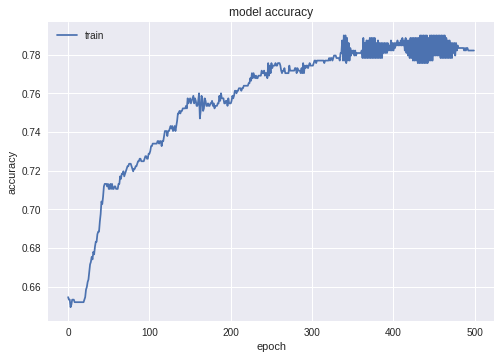

In [9]:
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

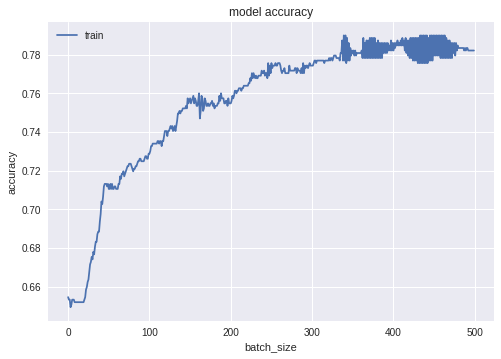

In [10]:
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch_size')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
for layer in model.layers:
    weights = layer.get_weights()

In [12]:
weights


[array([[ 2.1124532],
        [ 1.2498943],
        [-0.95692  ],
        [ 2.0634587]], dtype=float32), array([-0.38405004], dtype=float32)]